# What is good food?

## 📖 Background
You and your friend have gotten into a debate about nutrition. Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.

Being the data scientist that you are, you offer to look at the data yourself to answer a few key questions.

## 💾 The data

You source nutrition data from USDA's FoodData Central [website](https://fdc.nal.usda.gov/download-datasets.html). This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values are based on a 100g serving. Here is a description of the columns:

- **FDC_ID**: A unique identifier for each food item in the database.
- **Item**: The name or description of the food product.
- **Category**: The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories**: The energy content of the food, presented in kilocalories (kcal).
- **Protein**: The protein content of the food, measured in grams.
- **Carbohydrate**: The carbohydrate content of the food, measured in grams.
- **Total fat**: The total fat content of the food, measured in grams.
- **Cholesterol**: The cholesterol content of the food, measured in milligrams.
- **Fiber**: The dietary fiber content of the food, measured in grams.
- **Water**: The water content of the food, measured in grams.
- **Alcohol**: The alcohol content of the food (if any), measured in grams.
- **Vitamin C**: The Vitamin C content of the food, measured in milligrams.

In [193]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns







df = pd.read_csv('nutrition.csv')
df

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0 kcal,6.1 g,79.8 g,3.7 g,NaN,NaN,3.2 g,NaN,NaN
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0 kcal,8.0 g,46.0 g,1.8 g,NaN,NaN,42.6 g,NaN,NaN
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0 kcal,6.58 g,41.05 g,9.22 g,15.0 mg,2.2 g,40.34 g,0.0 g,0.0 mg
...,...,...,...,...,...,...,...,...,...,...,...,...
7788,175300,"Game meat, buffalo, water, cooked, roasted","Lamb, Veal, and Game Products",131.0 kcal,26.83 g,0.0 g,1.8 g,61.0 mg,0.0 g,68.81 g,NaN,0.0 mg
7789,175301,"Game meat, elk, raw","Lamb, Veal, and Game Products",111.0 kcal,22.95 g,0.0 g,1.45 g,55.0 mg,0.0 g,74.38 g,NaN,0.0 mg
7790,175302,"Game meat, elk, cooked, roasted","Lamb, Veal, and Game Products",146.0 kcal,30.19 g,0.0 g,1.9 g,73.0 mg,0.0 g,66.28 g,NaN,0.0 mg
7791,175303,"Game meat, goat, raw","Lamb, Veal, and Game Products",109.0 kcal,20.6 g,0.0 g,2.31 g,57.0 mg,0.0 g,75.84 g,NaN,0.0 mg


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FDC_ID        7793 non-null   int64 
 1   Item          7793 non-null   object
 2   Category      7793 non-null   object
 3   Calories      7793 non-null   object
 4   Protein       7793 non-null   object
 5   Carbohydrate  7793 non-null   object
 6   Total fat     7793 non-null   object
 7   Cholesterol   7394 non-null   object
 8   Fiber         7231 non-null   object
 9   Water         7793 non-null   object
 10  Alcohol       5399 non-null   object
 11  Vitamin C     7332 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.7+ KB


In [195]:
df.describe()

,FDC_ID
count,7793.000000
mean,171408.000000
std,2249.789657
min,167512.000000
25%,169460.000000
50%,171408.000000
75%,173356.000000
max,175304.000000


In [196]:
df.duplicated().sum()

0

In [197]:
df.shape

(7793, 12)

In [198]:
df.isnull().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol      399
Fiber            562
Water              0
Alcohol         2394
Vitamin C        461
dtype: int64

In [199]:
df.columns

Index(['FDC_ID', 'Item', 'Category', 'Calories', 'Protein', 'Carbohydrate',
       'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C'],
      dtype='object')

In [200]:
df.head(2)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0 kcal,5.88 g,41.18 g,13.24 g,0.0 mg,1.2 g,35.5 g,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0 kcal,4.34 g,53.42 g,11.27 g,0.0 mg,1.4 g,27.86 g,NaN,0.1 mg


In [201]:
df['Calories'] = df['Calories'].str.replace('kcal', '', case=False)

columns_to_process = ['Protein', 'Carbohydrate', 'Cholesterol', 'Vitamin C']

# Loop through the specified columns and remove 'my'
for column_name in columns_to_process:
    df[column_name] = df[column_name].str.replace('mg', '', case=False)
    
    
columns_to_process = ['Total fat', 'Fiber', 'Water', 'Alcohol', 'Protein', 'Carbohydrate']

# Loop through the specified columns and remove 'my'
for column_name in columns_to_process:
    df[column_name] = df[column_name].str.replace('g', '', case=False)

In [202]:
df.head(2)

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.5,NaN,NaN
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,NaN,0.1


In [203]:
a = ['Calories', 'Protein', 'Carbohydrate',
       'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

for column_name in a:
    df[column_name] = df[column_name].astype('float')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   float64
 4   Protein       7793 non-null   float64
 5   Carbohydrate  7793 non-null   float64
 6   Total fat     7793 non-null   float64
 7   Cholesterol   7394 non-null   float64
 8   Fiber         7231 non-null   float64
 9   Water         7793 non-null   float64
 10  Alcohol       5399 non-null   float64
 11  Vitamin C     7332 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 730.7+ KB


In [205]:
df.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7394.000000,7231.000000,7793.000000,5399.000000,7332.000000
mean,171408.000000,220.243118,11.926873,19.569788,10.687361,45.045307,1.979118,56.033466,0.184293,8.975559
std,2249.789657,168.752033,10.859968,25.705634,16.381682,126.327041,4.310590,29.491176,1.972508,68.040908
min,167512.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169460.000000,91.000000,2.270000,0.000000,0.800000,0.000000,0.000000,38.140000,0.000000,0.000000
50%,171408.000000,183.000000,8.980000,7.600000,5.060000,8.000000,0.300000,64.160000,0.000000,0.000000
75%,173356.000000,317.000000,20.770000,27.120000,13.500000,71.000000,2.300000,77.960000,0.000000,3.200000
max,175304.000000,902.000000,88.320000,100.000000,100.000000,3100.000000,79.000000,100.000000,42.500000,2732.000000


In [206]:
a = ['Calories', 'Protein', 'Carbohydrate',
       'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

for column_name in a:
    df[column_name] = df[column_name].fillna( df[column_name].mean())

In [207]:
df.isna().sum()

FDC_ID          0
Item            0
Category        0
Calories        0
Protein         0
Carbohydrate    0
Total fat       0
Cholesterol     0
Fiber           0
Water           0
Alcohol         0
Vitamin C       0
dtype: int64

## Exploratory Data Analysis

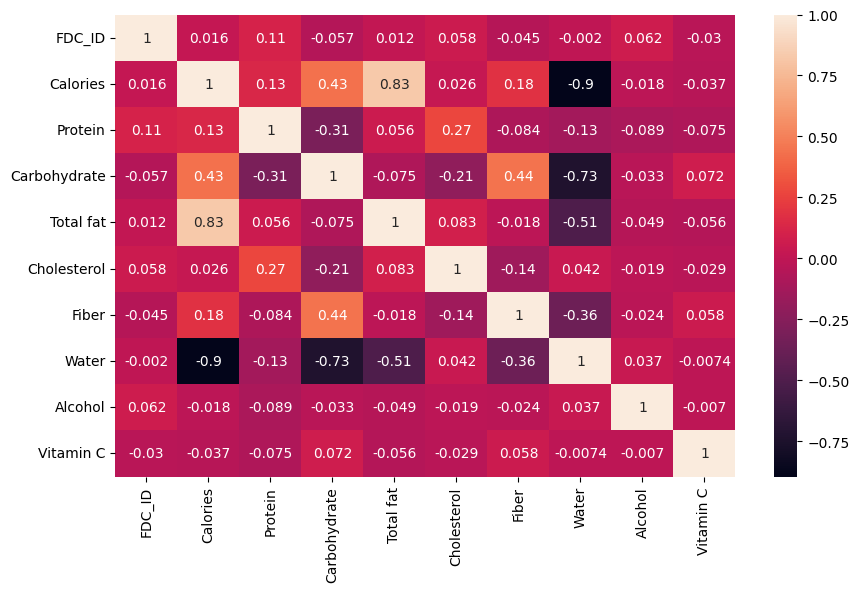

In [208]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [209]:
# Filter records with 'Fruits and Fruit Juices' category
fruit_df = df[df['Category'] == 'Fruits and Fruit Juices']

# Find the fruit with the highest Vitamin C content
max_vitamin_c_fruit = fruit_df.loc[fruit_df['Vitamin C'].idxmax()]['Item']
max_vitamin_c_content = fruit_df['Vitamin C'].max()

# Identify other sources of Vitamin C
other_sources_df = df[df['Vitamin C'] > 0]  
other_sources = other_sources_df[['Item', 'Category', 'Vitamin C']]

# Display results
print("Fruit with the highest Vitamin C content:")
print(f"{max_vitamin_c_fruit}: {max_vitamin_c_content} mg of Vitamin C")

print("\nOther sources of Vitamin C:")
print(other_sources.sort_values(by='Vitamin C', ascending=False).head(10))

Fruit with the highest Vitamin C content:
Acerola, (west indian cherry), raw: 1677.6 mg of Vitamin C

Other sources of Vitamin C:
                                                   Item  ... Vitamin C
3449  Babyfood, GERBER, 2nd Foods, apple, carrot and...  ...    2732.0
2140  Beverages, fruit-flavored drink, powder, with ...  ...    2400.0
2316  Beverages, Orange-flavor drink, breakfast type...  ...    2400.0
1454                  Peppers, sweet, red, freeze-dried  ...    1900.0
5220                 Acerola, (west indian cherry), raw  ...    1677.6
5221                                 Acerola juice, raw  ...    1600.0
2373  Beverages, tea, green, instant, decaffeinated,...  ...    1342.3
1619                               Chives, freeze-dried  ...     660.0
7016                      Spices, coriander leaf, dried  ...     566.7
2139  Beverages, fruit-flavored drink, dry powdered ...  ...     560.0

[10 rows x 3 columns]


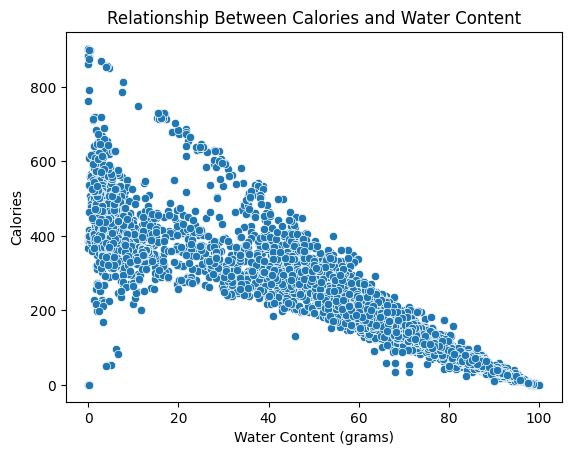

In [210]:
sns.scatterplot(x='Water', y='Calories', data=df)
plt.title('Relationship Between Calories and Water Content')
plt.xlabel('Water Content (grams)')
plt.ylabel('Calories')
plt.show()

In [211]:
# Calculate the total nutrient content
total_nutrients = df[['Protein', 'Carbohydrate', 'Total fat']].sum()

# Display the total nutrient content
print("\nTotal Nutrient Content:")
print(total_nutrients)


Total Nutrient Content:
Protein          92946.1200
Carbohydrate    152507.3600
Total fat        83286.6046
dtype: float64


In [212]:
category_counts = df['Category'].value_counts()
print(category_counts)

Beef Products                          954
Vegetables and Vegetable Products      814
Baked Products                         517
Lamb, Veal, and Game Products          464
Poultry Products                       383
Beverages                              366
Sweets                                 358
Fruits and Fruit Juices                355
Baby Foods                             345
Pork Products                          336
Fast Foods                             312
Dairy and Egg Products                 291
Legumes and Legume Products            290
Finfish and Shellfish Products         264
Soups, Sauces, and Gravies             254
Fats and Oils                          216
Breakfast Cereals                      195
Cereal Grains and Pasta                181
Snacks                                 176
Sausages and Luncheon Meats            167
American Indian/Alaska Native Foods    165
Nut and Seed Products                  137
Restaurant Foods                       109
Meals, Entr

In [213]:
# Calculate the average nutritional values for each category
average_nutrition = df.groupby('Category').mean()
print(average_nutrition)


                                            FDC_ID  ...  Vitamin C
Category                                            ...           
American Indian/Alaska Native Foods  168508.454545  ...  11.133564
Baby Foods                           171698.452174  ...  27.407543
Baked Products                       172881.462282  ...   1.548240
Beef Products                        171522.271488  ...   0.377778
Beverages                            173286.609290  ...  30.853753
Breakfast Cereals                    172997.820513  ...   7.591157
Cereal Grains and Pasta              169681.966851  ...   0.694930
Dairy and Egg Products               171528.986254  ...   1.893738
Fast Foods                           171380.368590  ...   2.662593
Fats and Oils                        171610.319444  ...   0.770751
Finfish and Shellfish Products       173656.867424  ...   1.511566
Fruits and Fruit Juices              170243.802817  ...  30.495080
Lamb, Veal, and Game Products        173723.435345  ...   2.57

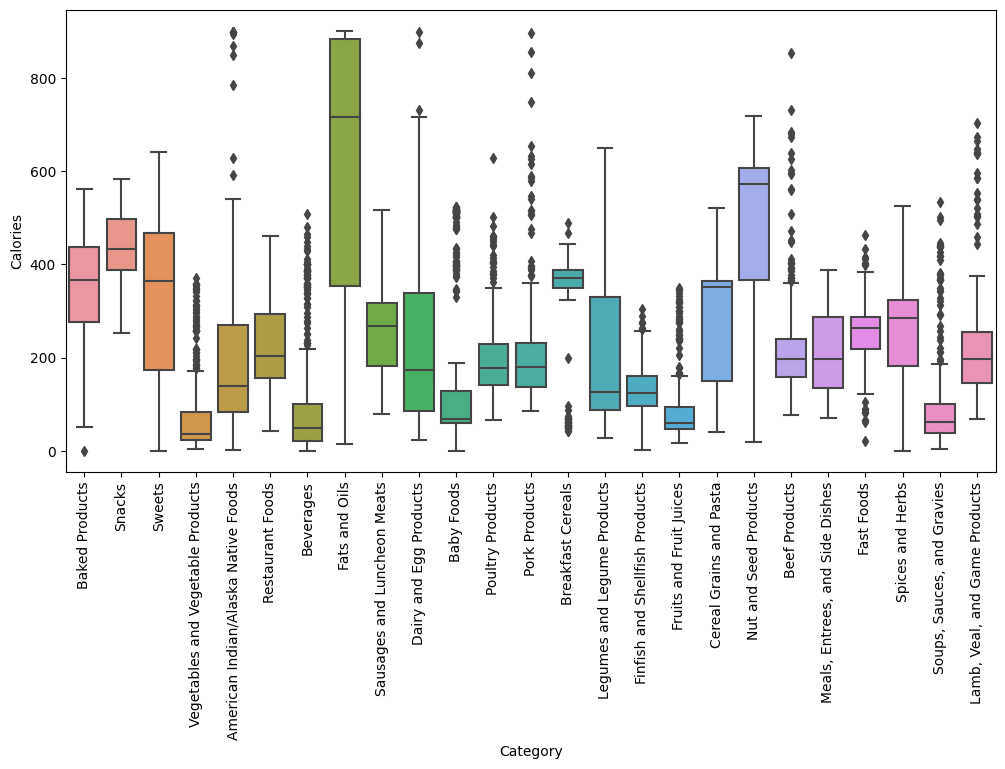

In [214]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Calories', data=df)
plt.xticks(rotation=90)
plt.show()

## 💪 Competition challenge

Create a report that covers the following:

1. Which fruit has the highest vitamin C content? What are some other sources of vitamin C?
2. Describe the relationship between the calories and water content of a food item.
3. What are the possible drawbacks of a zero-carb diet? What could be the drawbacks of a very high-protein diet?
4. According to the Cleveland Clinic [website](https://my.clevelandclinic.org/health/articles/4182-fat-and-calories), a gram of fat has around 9 kilocalories, and a gram of protein and a gram of carbohydrate contain 4 kilocalories each. Fit a linear model to test whether these estimates agree with the data.
5. Analyze the errors of your linear model to see what could be the hidden sources of calories in food.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

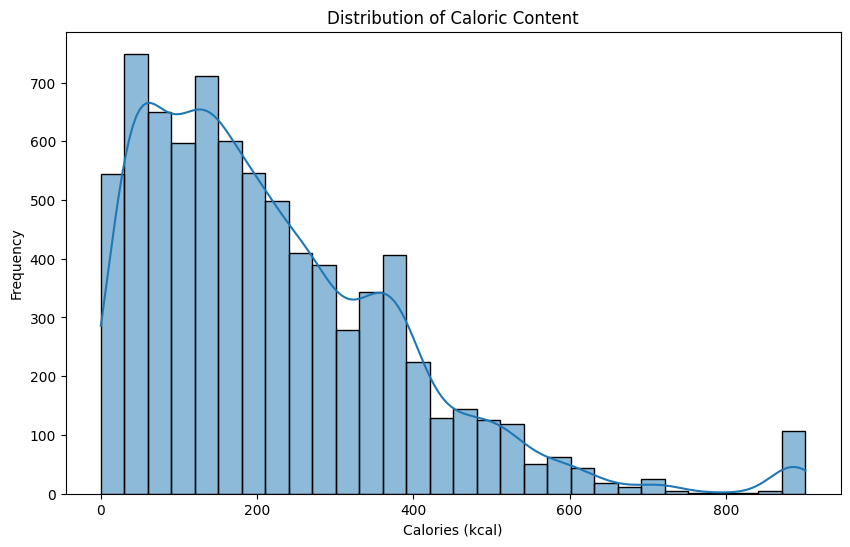

In [215]:
# Distribution of Caloric Content
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title('Distribution of Caloric Content')
plt.xlabel('Calories (kcal)')
plt.ylabel('Frequency')
plt.show()

## ⌛️ Time is ticking. Good luck!

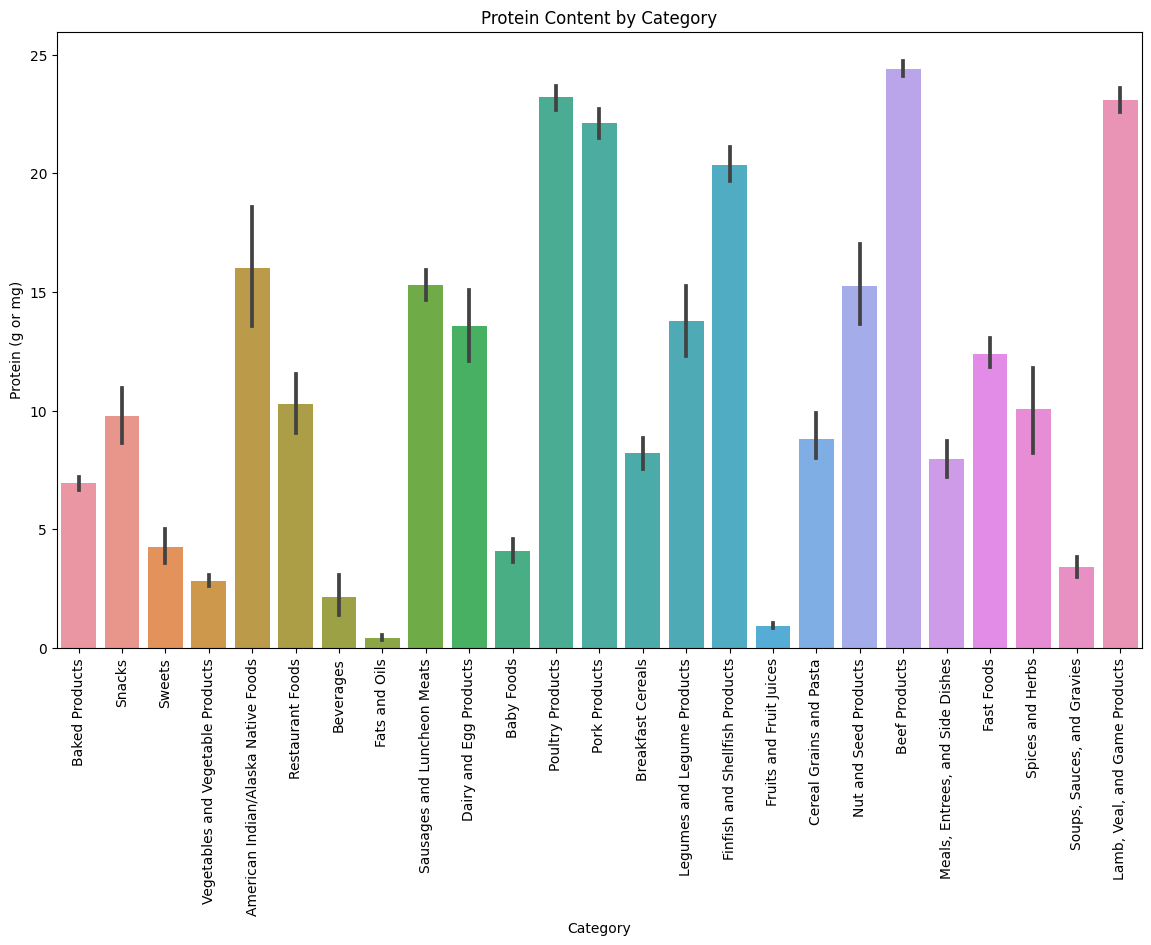

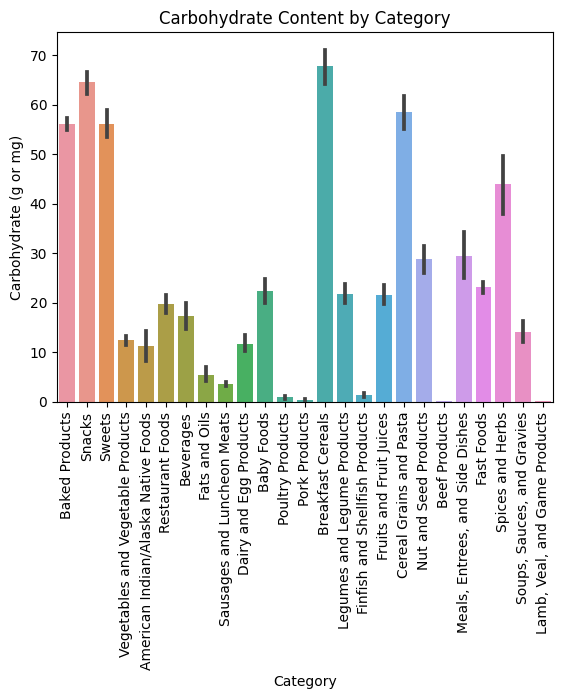

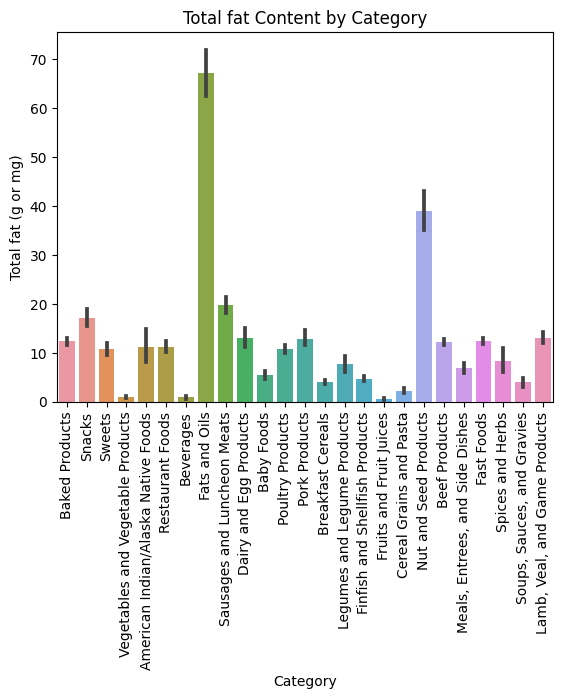

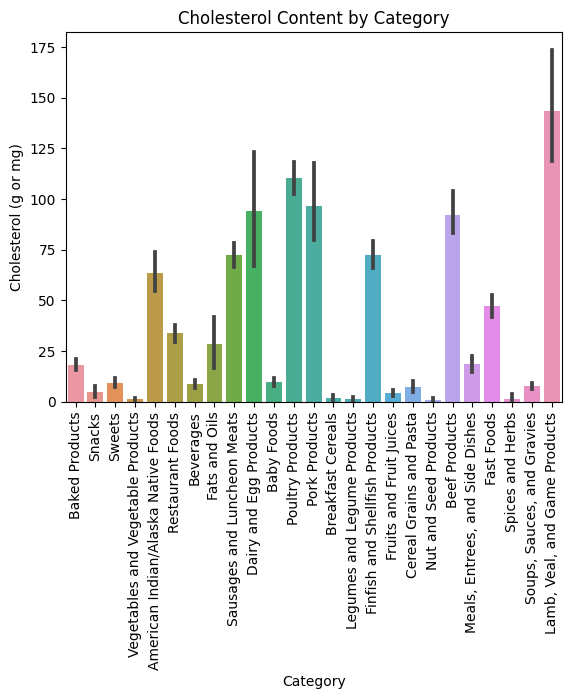

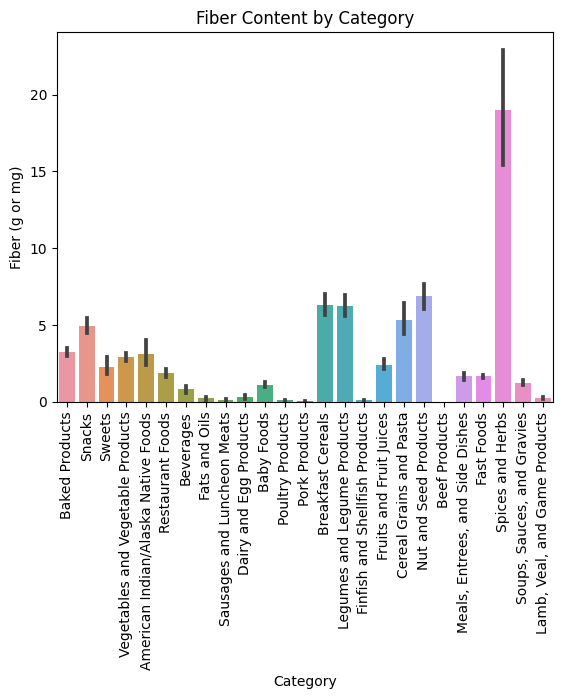

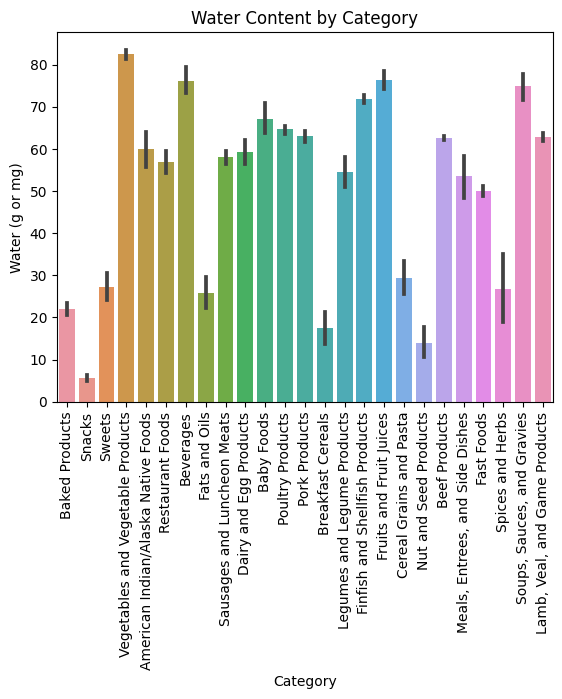

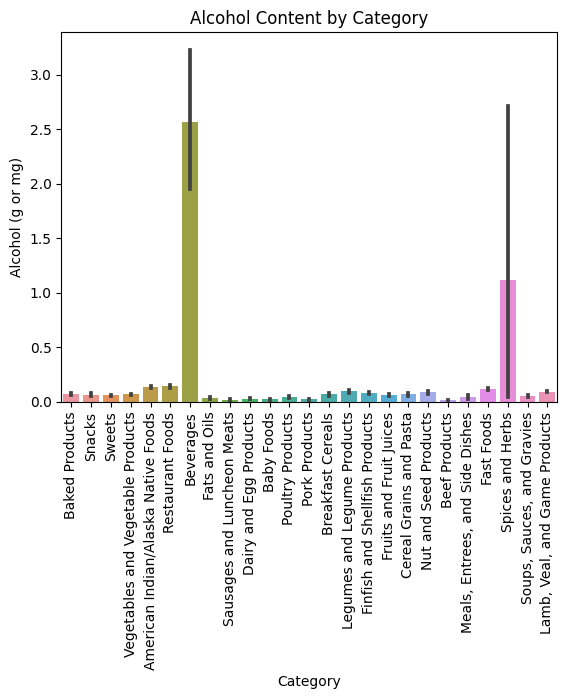

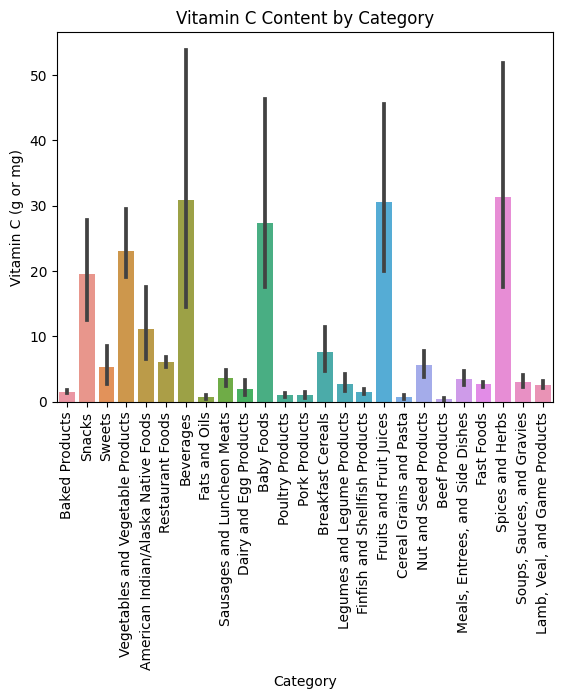

In [216]:
nutritional_columns = ['Protein', 'Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']

plt.figure(figsize=(14, 8))
for column in nutritional_columns:
    sns.barplot(x='Category', y=column, data=df)
    plt.title(f'{column} Content by Category')
    plt.xlabel('Category')
    plt.ylabel(f'{column} (g or mg)')
    plt.xticks(rotation=90)
    plt.show()

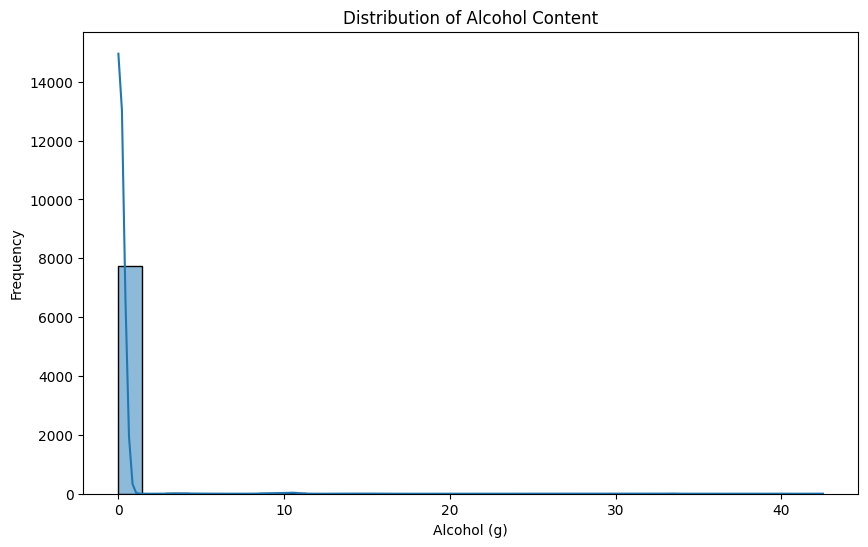

In [217]:
# Alcohol Content Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Alcohol'], bins=30, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol (g)')
plt.ylabel('Frequency')
plt.show()


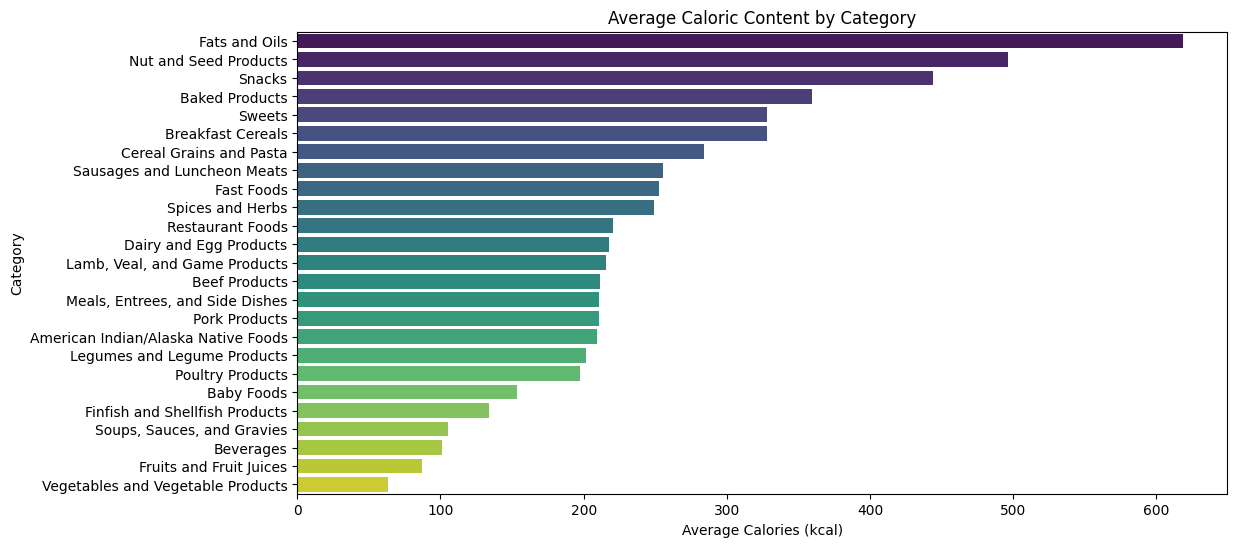

In [218]:
# Categories with Highest and Lowest Caloric Content
avg_calories_by_category = df.groupby('Category')['Calories'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_calories_by_category.values, y=avg_calories_by_category.index, palette='viridis')
plt.title('Average Caloric Content by Category')
plt.xlabel('Average Calories (kcal)')
plt.ylabel('Category')
plt.show()


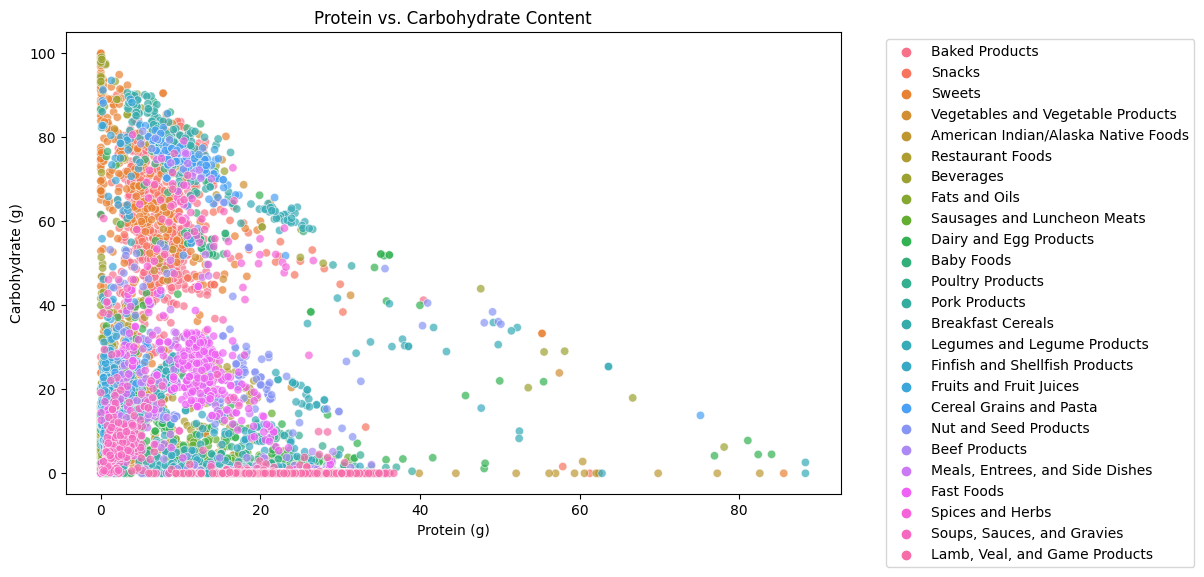

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Protein', y='Carbohydrate', data=df, hue='Category', alpha=0.7)
plt.title('Protein vs. Carbohydrate Content')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrate (g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [220]:
import statsmodels.api as sm

# Define the independent variables (features)
independent_vars = ['Total fat', 'Protein', 'Carbohydrate']

# Define the dependent variable (response)
dependent_var = 'Calories'

# Add a constant term to the independent variables
df['const'] = 1.0

# Fit the linear model
model = sm.OLS(df[dependent_var], df[independent_vars + ['const']])
results = model.fit()

# Display the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:55:50   Log-Likelihood:                -33174.
No. Observations:                7793   AIC:                         6.636e+04
Df Residuals:                    7789   BIC:                         6.638e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Total fat        8.8041      0.012    742.618   

The results of our analysis point to a robust fit of the linear model to our data, offering valuable insights into the relationship between nutritional components and calorie content. Here's a breakdown of what we've uncovered:

1. **Explained Variance:** The model does an impressive job, explaining about 99% of the variability in calorie content (R-squared = 0.990). This means our predictors—Total fat, Protein, and Carbohydrate—are substantial contributors to the overall story.

2. **Statistical Significance:** The F-statistic, a measure of overall model significance, is notably high (2.508e+05), with an extremely low p-value. This emphasizes the statistical importance of our model.

3. **Key Coefficients:** Each predictor's coefficient provides a glimpse into its impact on calorie content:

   - 'Total fat' holds a coefficient of roughly 8.8041.
   - 'Protein' is associated with a coefficient of approximately 4.0020.
   - 'Carbohydrate' contributes with a coefficient around 3.7986.

   All these coefficients are backed by very low p-values, reinforcing their statistical significance.

4. **Constant Term:** The model's intercept ('const') is estimated at about 4.0800, representing the baseline calorie content when our predictors are zero.

5. **Residual Insights:** Our assessment of residuals raises a point of consideration. The Jarque-Bera test hints at non-normal distribution, suggesting that our model might benefit from further exploration of the distribution of these prediction errors.

6. **Autocorrelation Check:** The Durbin-Watson statistic is close to 1.152, indicating a potential presence of autocorrelation in the residuals. While this needs attention, it's not a major deviation from the expected value of 2.

In summary, our findings underscore a powerful and statistically significant model for forecasting calorie content. The coefficients shed light on the influence of key nutritional components. However, the nuances of residuals merit exploration, inviting us to delve deeper into the intricacies of our predictive framework.